In [1]:
# Importing the library
import numpy as np # linear algebra
from numpy import sort
import pandas as pd # data processing, CSV file I/O
from IPython.display import display # Manage multiple output per cell
import datetime
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
target = 'INFO_FTR'
start_date = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M")
season_list = [2016]
#season_list = [2014, 2015, 2016]
league_list = ['D1', 'E0', 'E1', 'E2', 'F1', 'I1', 'SP1', 'SC0']
league_list = ['D1']
historical_training_year_list = [9]
best = 0

In [3]:
all_features = ["A_MEANS_FIVE_AC","A_MEANS_FIVE_AF","A_MEANS_FIVE_AR","A_MEANS_FIVE_AS","A_MEANS_FIVE_AST","A_MEANS_FIVE_AY","A_MEANS_FIVE_FTAG","A_MEANS_FIVE_FTHG","A_MEANS_FIVE_FTR_A","A_MEANS_FIVE_FTR_D","A_MEANS_FIVE_FTR_H","A_MEANS_FIVE_HC","A_MEANS_FIVE_HF","A_MEANS_FIVE_HR","A_MEANS_FIVE_HS","A_MEANS_FIVE_HST","A_MEANS_FIVE_HTAG","A_MEANS_FIVE_HTHG","A_MEANS_FIVE_HTR_A","A_MEANS_FIVE_HTR_D","A_MEANS_FIVE_HTR_H","A_MEANS_FIVE_HY","H_MEANS_FIVE_AC","H_MEANS_FIVE_AF","H_MEANS_FIVE_AR","H_MEANS_FIVE_AS","H_MEANS_FIVE_AST","H_MEANS_FIVE_AY","H_MEANS_FIVE_FTAG","H_MEANS_FIVE_FTHG","H_MEANS_FIVE_FTR_A","H_MEANS_FIVE_FTR_D","H_MEANS_FIVE_FTR_H","H_MEANS_FIVE_HC","H_MEANS_FIVE_HF","H_MEANS_FIVE_HR","H_MEANS_FIVE_HS","H_MEANS_FIVE_HST","H_MEANS_FIVE_HTAG","H_MEANS_FIVE_HTHG","H_MEANS_FIVE_HTR_A","H_MEANS_FIVE_HTR_D","H_MEANS_FIVE_HTR_H","H_MEANS_FIVE_HY","A_MEANS_THREE_AC","A_MEANS_THREE_AF","A_MEANS_THREE_AR","A_MEANS_THREE_AS","A_MEANS_THREE_AST","A_MEANS_THREE_AY","A_MEANS_THREE_FTAG","A_MEANS_THREE_FTHG","A_MEANS_THREE_FTR_A","A_MEANS_THREE_FTR_D","A_MEANS_THREE_FTR_H","A_MEANS_THREE_HC","A_MEANS_THREE_HF","A_MEANS_THREE_HR","A_MEANS_THREE_HS","A_MEANS_THREE_HST","A_MEANS_THREE_HTAG","A_MEANS_THREE_HTHG","A_MEANS_THREE_HTR_A","A_MEANS_THREE_HTR_D","A_MEANS_THREE_HTR_H","A_MEANS_THREE_HY","H_MEANS_THREE_AC","H_MEANS_THREE_AF","H_MEANS_THREE_AR","H_MEANS_THREE_AS","H_MEANS_THREE_AST","H_MEANS_THREE_AY","H_MEANS_THREE_FTAG","H_MEANS_THREE_FTHG","H_MEANS_THREE_FTR_A","H_MEANS_THREE_FTR_D","H_MEANS_THREE_FTR_H","H_MEANS_THREE_HC","H_MEANS_THREE_HF","H_MEANS_THREE_HR","H_MEANS_THREE_HS","H_MEANS_THREE_HST","H_MEANS_THREE_HTAG","H_MEANS_THREE_HTHG","H_MEANS_THREE_HTR_A","H_MEANS_THREE_HTR_D","H_MEANS_THREE_HTR_H","H_MEANS_THREE_HY","A_STD_FIVE_AC","A_STD_FIVE_AF","A_STD_FIVE_AR","A_STD_FIVE_AS","A_STD_FIVE_AST","A_STD_FIVE_AY","A_STD_FIVE_FTAG","A_STD_FIVE_FTHG","A_STD_FIVE_FTR_A","A_STD_FIVE_FTR_D","A_STD_FIVE_FTR_H","A_STD_FIVE_HC","A_STD_FIVE_HF","A_STD_FIVE_HR","A_STD_FIVE_HS","A_STD_FIVE_HST","A_STD_FIVE_HTAG","A_STD_FIVE_HTHG","A_STD_FIVE_HTR_A","A_STD_FIVE_HTR_D","A_STD_FIVE_HTR_H","A_STD_FIVE_HY","H_STD_FIVE_AC","H_STD_FIVE_AF","H_STD_FIVE_AR","H_STD_FIVE_AS","H_STD_FIVE_AST","H_STD_FIVE_AY","H_STD_FIVE_FTAG","H_STD_FIVE_FTHG","H_STD_FIVE_FTR_A","H_STD_FIVE_FTR_D","H_STD_FIVE_FTR_H","H_STD_FIVE_HC","H_STD_FIVE_HF","H_STD_FIVE_HR","H_STD_FIVE_HS","H_STD_FIVE_HST","H_STD_FIVE_HTAG","H_STD_FIVE_HTHG","H_STD_FIVE_HTR_A","H_STD_FIVE_HTR_D","H_STD_FIVE_HTR_H","H_STD_FIVE_HY","A_STD_THREE_AC","A_STD_THREE_AF","A_STD_THREE_AR","A_STD_THREE_AS","A_STD_THREE_AST","A_STD_THREE_AY","A_STD_THREE_FTAG","A_STD_THREE_FTHG","A_STD_THREE_FTR_A","A_STD_THREE_FTR_D","A_STD_THREE_FTR_H","A_STD_THREE_HC","A_STD_THREE_HF","A_STD_THREE_HR","A_STD_THREE_HS","A_STD_THREE_HST","A_STD_THREE_HTAG","A_STD_THREE_HTHG","A_STD_THREE_HTR_A","A_STD_THREE_HTR_D","A_STD_THREE_HTR_H","A_STD_THREE_HY","H_STD_THREE_AC","H_STD_THREE_AF","H_STD_THREE_AR","H_STD_THREE_AS","H_STD_THREE_AST","H_STD_THREE_AY","H_STD_THREE_FTAG","H_STD_THREE_FTHG","H_STD_THREE_FTR_A","H_STD_THREE_FTR_D","H_STD_THREE_FTR_H","H_STD_THREE_HC","H_STD_THREE_HF","H_STD_THREE_HR","H_STD_THREE_HS","H_STD_THREE_HST","H_STD_THREE_HTAG","H_STD_THREE_HTHG","H_STD_THREE_HTR_A","H_STD_THREE_HTR_D","H_STD_THREE_HTR_H","H_STD_THREE_HY"]
all_features_extend = ["A_MEANS_FIVE_AC","A_MEANS_FIVE_AF","A_MEANS_FIVE_AR","A_MEANS_FIVE_AS","A_MEANS_FIVE_AST","A_MEANS_FIVE_AY","A_MEANS_FIVE_FTAG","A_MEANS_FIVE_FTHG","A_MEANS_FIVE_FTR_A","A_MEANS_FIVE_FTR_D","A_MEANS_FIVE_FTR_H","A_MEANS_FIVE_HC","A_MEANS_FIVE_HF","A_MEANS_FIVE_HR","A_MEANS_FIVE_HS","A_MEANS_FIVE_HST","A_MEANS_FIVE_HTAG","A_MEANS_FIVE_HTHG","A_MEANS_FIVE_HTR_A","A_MEANS_FIVE_HTR_D","A_MEANS_FIVE_HTR_H","A_MEANS_FIVE_HY","H_MEANS_FIVE_AC","H_MEANS_FIVE_AF","H_MEANS_FIVE_AR","H_MEANS_FIVE_AS","H_MEANS_FIVE_AST","H_MEANS_FIVE_AY","H_MEANS_FIVE_FTAG","H_MEANS_FIVE_FTHG","H_MEANS_FIVE_FTR_A","H_MEANS_FIVE_FTR_D","H_MEANS_FIVE_FTR_H","H_MEANS_FIVE_HC","H_MEANS_FIVE_HF","H_MEANS_FIVE_HR","H_MEANS_FIVE_HS","H_MEANS_FIVE_HST","H_MEANS_FIVE_HTAG","H_MEANS_FIVE_HTHG","H_MEANS_FIVE_HTR_A","H_MEANS_FIVE_HTR_D","H_MEANS_FIVE_HTR_H","H_MEANS_FIVE_HY","A_MEANS_THREE_AC","A_MEANS_THREE_AF","A_MEANS_THREE_AR","A_MEANS_THREE_AS","A_MEANS_THREE_AST","A_MEANS_THREE_AY","A_MEANS_THREE_FTAG","A_MEANS_THREE_FTHG","A_MEANS_THREE_FTR_A","A_MEANS_THREE_FTR_D","A_MEANS_THREE_FTR_H","A_MEANS_THREE_HC","A_MEANS_THREE_HF","A_MEANS_THREE_HR","A_MEANS_THREE_HS","A_MEANS_THREE_HST","A_MEANS_THREE_HTAG","A_MEANS_THREE_HTHG","A_MEANS_THREE_HTR_A","A_MEANS_THREE_HTR_D","A_MEANS_THREE_HTR_H","A_MEANS_THREE_HY","H_MEANS_THREE_AC","H_MEANS_THREE_AF","H_MEANS_THREE_AR","H_MEANS_THREE_AS","H_MEANS_THREE_AST","H_MEANS_THREE_AY","H_MEANS_THREE_FTAG","H_MEANS_THREE_FTHG","H_MEANS_THREE_FTR_A","H_MEANS_THREE_FTR_D","H_MEANS_THREE_FTR_H","H_MEANS_THREE_HC","H_MEANS_THREE_HF","H_MEANS_THREE_HR","H_MEANS_THREE_HS","H_MEANS_THREE_HST","H_MEANS_THREE_HTAG","H_MEANS_THREE_HTHG","H_MEANS_THREE_HTR_A","H_MEANS_THREE_HTR_D","H_MEANS_THREE_HTR_H","H_MEANS_THREE_HY","A_STD_FIVE_AC","A_STD_FIVE_AF","A_STD_FIVE_AR","A_STD_FIVE_AS","A_STD_FIVE_AST","A_STD_FIVE_AY","A_STD_FIVE_FTAG","A_STD_FIVE_FTHG","A_STD_FIVE_FTR_A","A_STD_FIVE_FTR_D","A_STD_FIVE_FTR_H","A_STD_FIVE_HC","A_STD_FIVE_HF","A_STD_FIVE_HR","A_STD_FIVE_HS","A_STD_FIVE_HST","A_STD_FIVE_HTAG","A_STD_FIVE_HTHG","A_STD_FIVE_HTR_A","A_STD_FIVE_HTR_D","A_STD_FIVE_HTR_H","A_STD_FIVE_HY","H_STD_FIVE_AC","H_STD_FIVE_AF","H_STD_FIVE_AR","H_STD_FIVE_AS","H_STD_FIVE_AST","H_STD_FIVE_AY","H_STD_FIVE_FTAG","H_STD_FIVE_FTHG","H_STD_FIVE_FTR_A","H_STD_FIVE_FTR_D","H_STD_FIVE_FTR_H","H_STD_FIVE_HC","H_STD_FIVE_HF","H_STD_FIVE_HR","H_STD_FIVE_HS","H_STD_FIVE_HST","H_STD_FIVE_HTAG","H_STD_FIVE_HTHG","H_STD_FIVE_HTR_A","H_STD_FIVE_HTR_D","H_STD_FIVE_HTR_H","H_STD_FIVE_HY","A_STD_THREE_AC","A_STD_THREE_AF","A_STD_THREE_AR","A_STD_THREE_AS","A_STD_THREE_AST","A_STD_THREE_AY","A_STD_THREE_FTAG","A_STD_THREE_FTHG","A_STD_THREE_FTR_A","A_STD_THREE_FTR_D","A_STD_THREE_FTR_H","A_STD_THREE_HC","A_STD_THREE_HF","A_STD_THREE_HR","A_STD_THREE_HS","A_STD_THREE_HST","A_STD_THREE_HTAG","A_STD_THREE_HTHG","A_STD_THREE_HTR_A","A_STD_THREE_HTR_D","A_STD_THREE_HTR_H","A_STD_THREE_HY","H_STD_THREE_AC","H_STD_THREE_AF","H_STD_THREE_AR","H_STD_THREE_AS","H_STD_THREE_AST","H_STD_THREE_AY","H_STD_THREE_FTAG","H_STD_THREE_FTHG","H_STD_THREE_FTR_A","H_STD_THREE_FTR_D","H_STD_THREE_FTR_H","H_STD_THREE_HC","H_STD_THREE_HF","H_STD_THREE_HR","H_STD_THREE_HS","H_STD_THREE_HST","H_STD_THREE_HTAG","H_STD_THREE_HTHG","H_STD_THREE_HTR_A","H_STD_THREE_HTR_D","H_STD_THREE_HTR_H","H_STD_THREE_HY","AandH_SEVEN_AC","AandH_SEVEN_AF","AandH_SEVEN_AR","AandH_SEVEN_AS","AandH_SEVEN_AST","AandH_SEVEN_AY","AandH_SEVEN_FTAG","AandH_SEVEN_FTHG","AandH_SEVEN_FTR_A","AandH_SEVEN_FTR_D","AandH_SEVEN_FTR_H","AandH_SEVEN_HC","AandH_SEVEN_HF","AandH_SEVEN_HR","AandH_SEVEN_HS","AandH_SEVEN_HST","AandH_SEVEN_HTAG","AandH_SEVEN_HTHG","AandH_SEVEN_HTR_A","AandH_SEVEN_HTR_D","AandH_SEVEN_HTR_H","AandH_SEVEN_HY","HandA_SEVEN_AC","HandA_SEVEN_AF","HandA_SEVEN_AR","HandA_SEVEN_AS","HandA_SEVEN_AST","HandA_SEVEN_AY","HandA_SEVEN_FTAG","HandA_SEVEN_FTHG","HandA_SEVEN_FTR_A","HandA_SEVEN_FTR_D","HandA_SEVEN_FTR_H","HandA_SEVEN_HC","HandA_SEVEN_HF","HandA_SEVEN_HR","HandA_SEVEN_HS","HandA_SEVEN_HST","HandA_SEVEN_HTAG","HandA_SEVEN_HTHG","HandA_SEVEN_HTR_A","HandA_SEVEN_HTR_D","HandA_SEVEN_HTR_H","HandA_SEVEN_HY"]
all_features_extend_no_fouls = ["A_MEANS_FIVE_AC","A_MEANS_FIVE_AR","A_MEANS_FIVE_AS","A_MEANS_FIVE_AST","A_MEANS_FIVE_FTAG","A_MEANS_FIVE_FTHG","A_MEANS_FIVE_FTR_A","A_MEANS_FIVE_FTR_D","A_MEANS_FIVE_FTR_H","A_MEANS_FIVE_HC","A_MEANS_FIVE_HS","A_MEANS_FIVE_HST","A_MEANS_FIVE_HTAG","A_MEANS_FIVE_HTHG","A_MEANS_FIVE_HTR_A","A_MEANS_FIVE_HTR_D","A_MEANS_FIVE_HTR_H","H_MEANS_FIVE_AC","H_MEANS_FIVE_AR","H_MEANS_FIVE_AS","H_MEANS_FIVE_AST","H_MEANS_FIVE_FTAG","H_MEANS_FIVE_FTHG","H_MEANS_FIVE_FTR_A","H_MEANS_FIVE_FTR_D","H_MEANS_FIVE_FTR_H","H_MEANS_FIVE_HC","H_MEANS_FIVE_HS","H_MEANS_FIVE_HST","H_MEANS_FIVE_HTAG","H_MEANS_FIVE_HTHG","H_MEANS_FIVE_HTR_A","H_MEANS_FIVE_HTR_D","H_MEANS_FIVE_HTR_H","A_MEANS_THREE_AC","A_MEANS_THREE_AR","A_MEANS_THREE_AS","A_MEANS_THREE_AST","A_MEANS_THREE_FTAG","A_MEANS_THREE_FTHG","A_MEANS_THREE_FTR_A","A_MEANS_THREE_FTR_D","A_MEANS_THREE_FTR_H","A_MEANS_THREE_HC","A_MEANS_THREE_HS","A_MEANS_THREE_HST","A_MEANS_THREE_HTAG","A_MEANS_THREE_HTHG","A_MEANS_THREE_HTR_A","A_MEANS_THREE_HTR_D","A_MEANS_THREE_HTR_H","H_MEANS_THREE_AC","H_MEANS_THREE_AR","H_MEANS_THREE_AS","H_MEANS_THREE_AST","H_MEANS_THREE_FTAG","H_MEANS_THREE_FTHG","H_MEANS_THREE_FTR_A","H_MEANS_THREE_FTR_D","H_MEANS_THREE_FTR_H","H_MEANS_THREE_HC","H_MEANS_THREE_HS","H_MEANS_THREE_HST","H_MEANS_THREE_HTAG","H_MEANS_THREE_HTHG","H_MEANS_THREE_HTR_A","H_MEANS_THREE_HTR_D","H_MEANS_THREE_HTR_H","A_STD_FIVE_AC","A_STD_FIVE_AR","A_STD_FIVE_AS","A_STD_FIVE_AST","A_STD_FIVE_FTAG","A_STD_FIVE_FTHG","A_STD_FIVE_FTR_A","A_STD_FIVE_FTR_D","A_STD_FIVE_FTR_H","A_STD_FIVE_HC","A_STD_FIVE_HS","A_STD_FIVE_HST","A_STD_FIVE_HTAG","A_STD_FIVE_HTHG","A_STD_FIVE_HTR_A","A_STD_FIVE_HTR_D","A_STD_FIVE_HTR_H","H_STD_FIVE_AC","H_STD_FIVE_AR","H_STD_FIVE_AS","H_STD_FIVE_AST","H_STD_FIVE_FTAG","H_STD_FIVE_FTHG","H_STD_FIVE_FTR_A","H_STD_FIVE_FTR_D","H_STD_FIVE_FTR_H","H_STD_FIVE_HC","H_STD_FIVE_HS","H_STD_FIVE_HST","H_STD_FIVE_HTAG","H_STD_FIVE_HTHG","H_STD_FIVE_HTR_A","H_STD_FIVE_HTR_D","H_STD_FIVE_HTR_H","A_STD_THREE_AC","A_STD_THREE_AR","A_STD_THREE_AS","A_STD_THREE_AST","A_STD_THREE_FTAG","A_STD_THREE_FTHG","A_STD_THREE_FTR_A","A_STD_THREE_FTR_D","A_STD_THREE_FTR_H","A_STD_THREE_HC","A_STD_THREE_HS","A_STD_THREE_HST","A_STD_THREE_HTAG","A_STD_THREE_HTHG","A_STD_THREE_HTR_A","A_STD_THREE_HTR_D","A_STD_THREE_HTR_H","H_STD_THREE_AC","H_STD_THREE_AR","H_STD_THREE_AS","H_STD_THREE_AST","H_STD_THREE_FTAG","H_STD_THREE_FTHG","H_STD_THREE_FTR_A","H_STD_THREE_FTR_D","H_STD_THREE_FTR_H","H_STD_THREE_HC","H_STD_THREE_HS","H_STD_THREE_HST","H_STD_THREE_HTAG","H_STD_THREE_HTHG","H_STD_THREE_HTR_A","H_STD_THREE_HTR_D","H_STD_THREE_HTR_H","AandH_SEVEN_AC","AandH_SEVEN_AR","AandH_SEVEN_AS","AandH_SEVEN_AST","AandH_SEVEN_FTAG","AandH_SEVEN_FTHG","AandH_SEVEN_FTR_A","AandH_SEVEN_FTR_D","AandH_SEVEN_FTR_H","AandH_SEVEN_HC","AandH_SEVEN_HS","AandH_SEVEN_HST","AandH_SEVEN_HTAG","AandH_SEVEN_HTHG","AandH_SEVEN_HTR_A","AandH_SEVEN_HTR_D","AandH_SEVEN_HTR_H","HandA_SEVEN_AC","HandA_SEVEN_AR","HandA_SEVEN_AS","HandA_SEVEN_AST","HandA_SEVEN_FTAG","HandA_SEVEN_FTHG","HandA_SEVEN_FTR_A","HandA_SEVEN_FTR_D","HandA_SEVEN_FTR_H","HandA_SEVEN_HC","HandA_SEVEN_HS","HandA_SEVEN_HST","HandA_SEVEN_HTAG","HandA_SEVEN_HTHG","HandA_SEVEN_HTR_A","HandA_SEVEN_HTR_D","HandA_SEVEN_HTR_H"]
features_list = [
    ['all_features', all_features_extend]
]

In [4]:
best_params = {
    'learning_rate': 0.01,
    'n_estimators': 200,
    'max_depth': 4,
    'min_child_weight': 1,
    'gamma': 0.41,
    'subsample': 0.76,
    'colsample_bytree': 0.4,
    'objective': 'multi:softprob',
    'scale_pos_weight': 1,
    'reg_alpha': 0.46
}

In [5]:
# For which model we want to get the feature selection
from sklearn.naive_bayes import GaussianNB
#selection_model = GaussianNB()
selection_model = MLPClassifier(
                    random_state=0 ,
                    hidden_layer_sizes=(160, ),
                    activation='logistic',
                    solver='sgd',
                    alpha=1.4,
                    max_iter=260
                )

In [6]:
# DB Sqlite connection
import sqlite3
db = "/Users/thibaultclement/Project/ligue1-predict/src/notebook/data/db/soccer_predict.sqlite"
conn = sqlite3.connect(db)
cur = conn.cursor()

In [7]:
# Get all prematch data
df_all = pd.read_sql_query("SELECT * FROM pre_matchs_v4 ORDER BY INFO_Date ASC;", conn)
df_all = (df_all[df_all.columns.drop(['index'])])
df_all.shape

(37907, 234)

In [8]:
# Remove all game between June (include) and October (include)
df_all['INFO_Date'] = pd.to_datetime(df_all['INFO_Date'])
df_all['INFO_Date'].dt.month
df_all = df_all[(df_all['INFO_Date'].dt.month < 6) | (df_all['INFO_Date'].dt.month > 10)]
df_all.shape

(26988, 234)

In [9]:
def get_dataset(league, season, historical_training_year, features):
    # Filter by league
    df = df_all[(df_all['INFO_Div'] == league)]
    # Keep season for test and filter by number of historical season used to train
    date_start_learn = datetime.date(season-historical_training_year, 8, 1)
    date_end_learn = datetime.date(season, 8, 1)
    date_start_test_season = datetime.date(season, 8, 1)
    date_end_test_season = datetime.date(season+1, 8, 1)
    df_test = df[(df['INFO_Date'] > date_start_test_season)]
    df_test = df_test[(df_test['INFO_Date'] < date_end_test_season)]
    df = df[(df['INFO_Date'] > date_start_learn)]
    df = df[(df['INFO_Date'] < date_end_learn)]
    # Filter by feature used to train
    X = pd.get_dummies(df[features])
    y = df[target]
    X_test_season = pd.get_dummies(df_test[features])
    y_test_season = df_test[target]
    # Impute of missing values (NaN) with the mean
    #imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
    #imp = imp.fit(X)
    #X = imp.transform(X)
    #X_test_season = imp.transform(X_test_season)
    # Standardize features
    #sc_X = StandardScaler().fit(X)
    #X = sc_X.transform(X)
    #X_test_season = sc_X.transform(X_test_season)
    return df, df_test, X, y, X_test_season, y_test_season

In [10]:
for league in league_list:
    for season in season_list:
        for historical_training_year in historical_training_year_list:
            for features in features_list:
                print league,str(season),str(historical_training_year),features[0]
                df, df_test, X, y, X_test_season, y_test_season = get_dataset(league, season, historical_training_year, features[1])
                # train model
                model = XGBClassifier(
                    nthread=1, 
                    seed=15,
                    learning_rate=best_params['learning_rate'],
                    n_estimators=best_params['n_estimators'],
                    max_depth=best_params['max_depth'],
                    min_child_weight=best_params['min_child_weight'],
                    gamma=best_params['gamma'],
                    subsample=best_params['subsample'],
                    colsample_bytree=best_params['colsample_bytree'],
                    objective=best_params['objective'],
                    scale_pos_weight=best_params['scale_pos_weight'],
                    reg_alpha=best_params['reg_alpha']
                )
                model.fit(X, y, eval_metric='logloss')
                thresholds = np.unique(sort(model.feature_importances_))
                df_fs = pd.DataFrame(columns=('Thresh', 'n', 'll_mean', 'll_std'))
                for thresh in thresholds:
                    # select features using threshold
                    selection = SelectFromModel(model, threshold=thresh, prefit=True)
                    select_X_train = selection.transform(X)
                    # eval model
                    logloss = cross_val_score(selection_model, select_X_train, y, cv=8, scoring='accuracy', n_jobs=-1)
                    ll_mean = logloss.mean()
                    ll_std = logloss.std()
                    df2 = pd.DataFrame([[thresh, select_X_train.shape[1], ll_mean, ll_std]], columns=('Thresh', 'n', 'll_mean', 'll_std'))
                    df_fs = df_fs.append(df2)
                    if best < ll_mean:
                        best = ll_mean
                    print("Thresh=%.5f, n=%d, LogLoss mean: %.5f, LogLoss std: %.2f" % (thresh, select_X_train.shape[1], ll_mean, ll_std))
print best  

D1 2016 9 all_features
Thresh=0.00024, n=220, LogLoss mean: 0.49592, LogLoss std: 0.02
Thresh=0.00048, n=218, LogLoss mean: 0.49330, LogLoss std: 0.02
Thresh=0.00060, n=217, LogLoss mean: 0.48969, LogLoss std: 0.02


/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Thresh=0.00073, n=214, LogLoss mean: 0.49538, LogLoss std: 0.02
Thresh=0.00085, n=209, LogLoss mean: 0.49226, LogLoss std: 0.02
Thresh=0.00097, n=205, LogLoss mean: 0.49800, LogLoss std: 0.03
Thresh=0.00109, n=199, LogLoss mean: 0.49227, LogLoss std: 0.02
Thresh=0.00121, n=192, LogLoss mean: 0.49899, LogLoss std: 0.02
Thresh=0.00133, n=183, LogLoss mean: 0.49487, LogLoss std: 0.02
Thresh=0.00145, n=176, LogLoss mean: 0.49954, LogLoss std: 0.02
Thresh=0.00157, n=172, LogLoss mean: 0.50059, LogLoss std: 0.02
Thresh=0.00169, n=168, LogLoss mean: 0.49696, LogLoss std: 0.02
Thresh=0.00181, n=166, LogLoss mean: 0.49383, LogLoss std: 0.02
Thresh=0.00193, n=161, LogLoss mean: 0.49279, LogLoss std: 0.02
Thresh=0.00206, n=155, LogLoss mean: 0.48657, LogLoss std: 0.02
Thresh=0.00218, n=152, LogLoss mean: 0.49695, LogLoss std: 0.03
Thresh=0.00230, n=148, LogLoss mean: 0.50004, LogLoss std: 0.02
Thresh=0.00242, n=142, LogLoss mean: 0.49333, LogLoss std: 0.02
Thresh=0.00254, n=137, LogLoss mean: 0.4

In [11]:
np.set_printoptions(threshold=np.nan)
selection = SelectFromModel(model, threshold=0.02953, prefit=True)
feature_idx = selection.get_support()
feature_name = pd.get_dummies(df[features_list[0][1]]).columns[feature_idx]
feature_name

Index([], dtype='object')

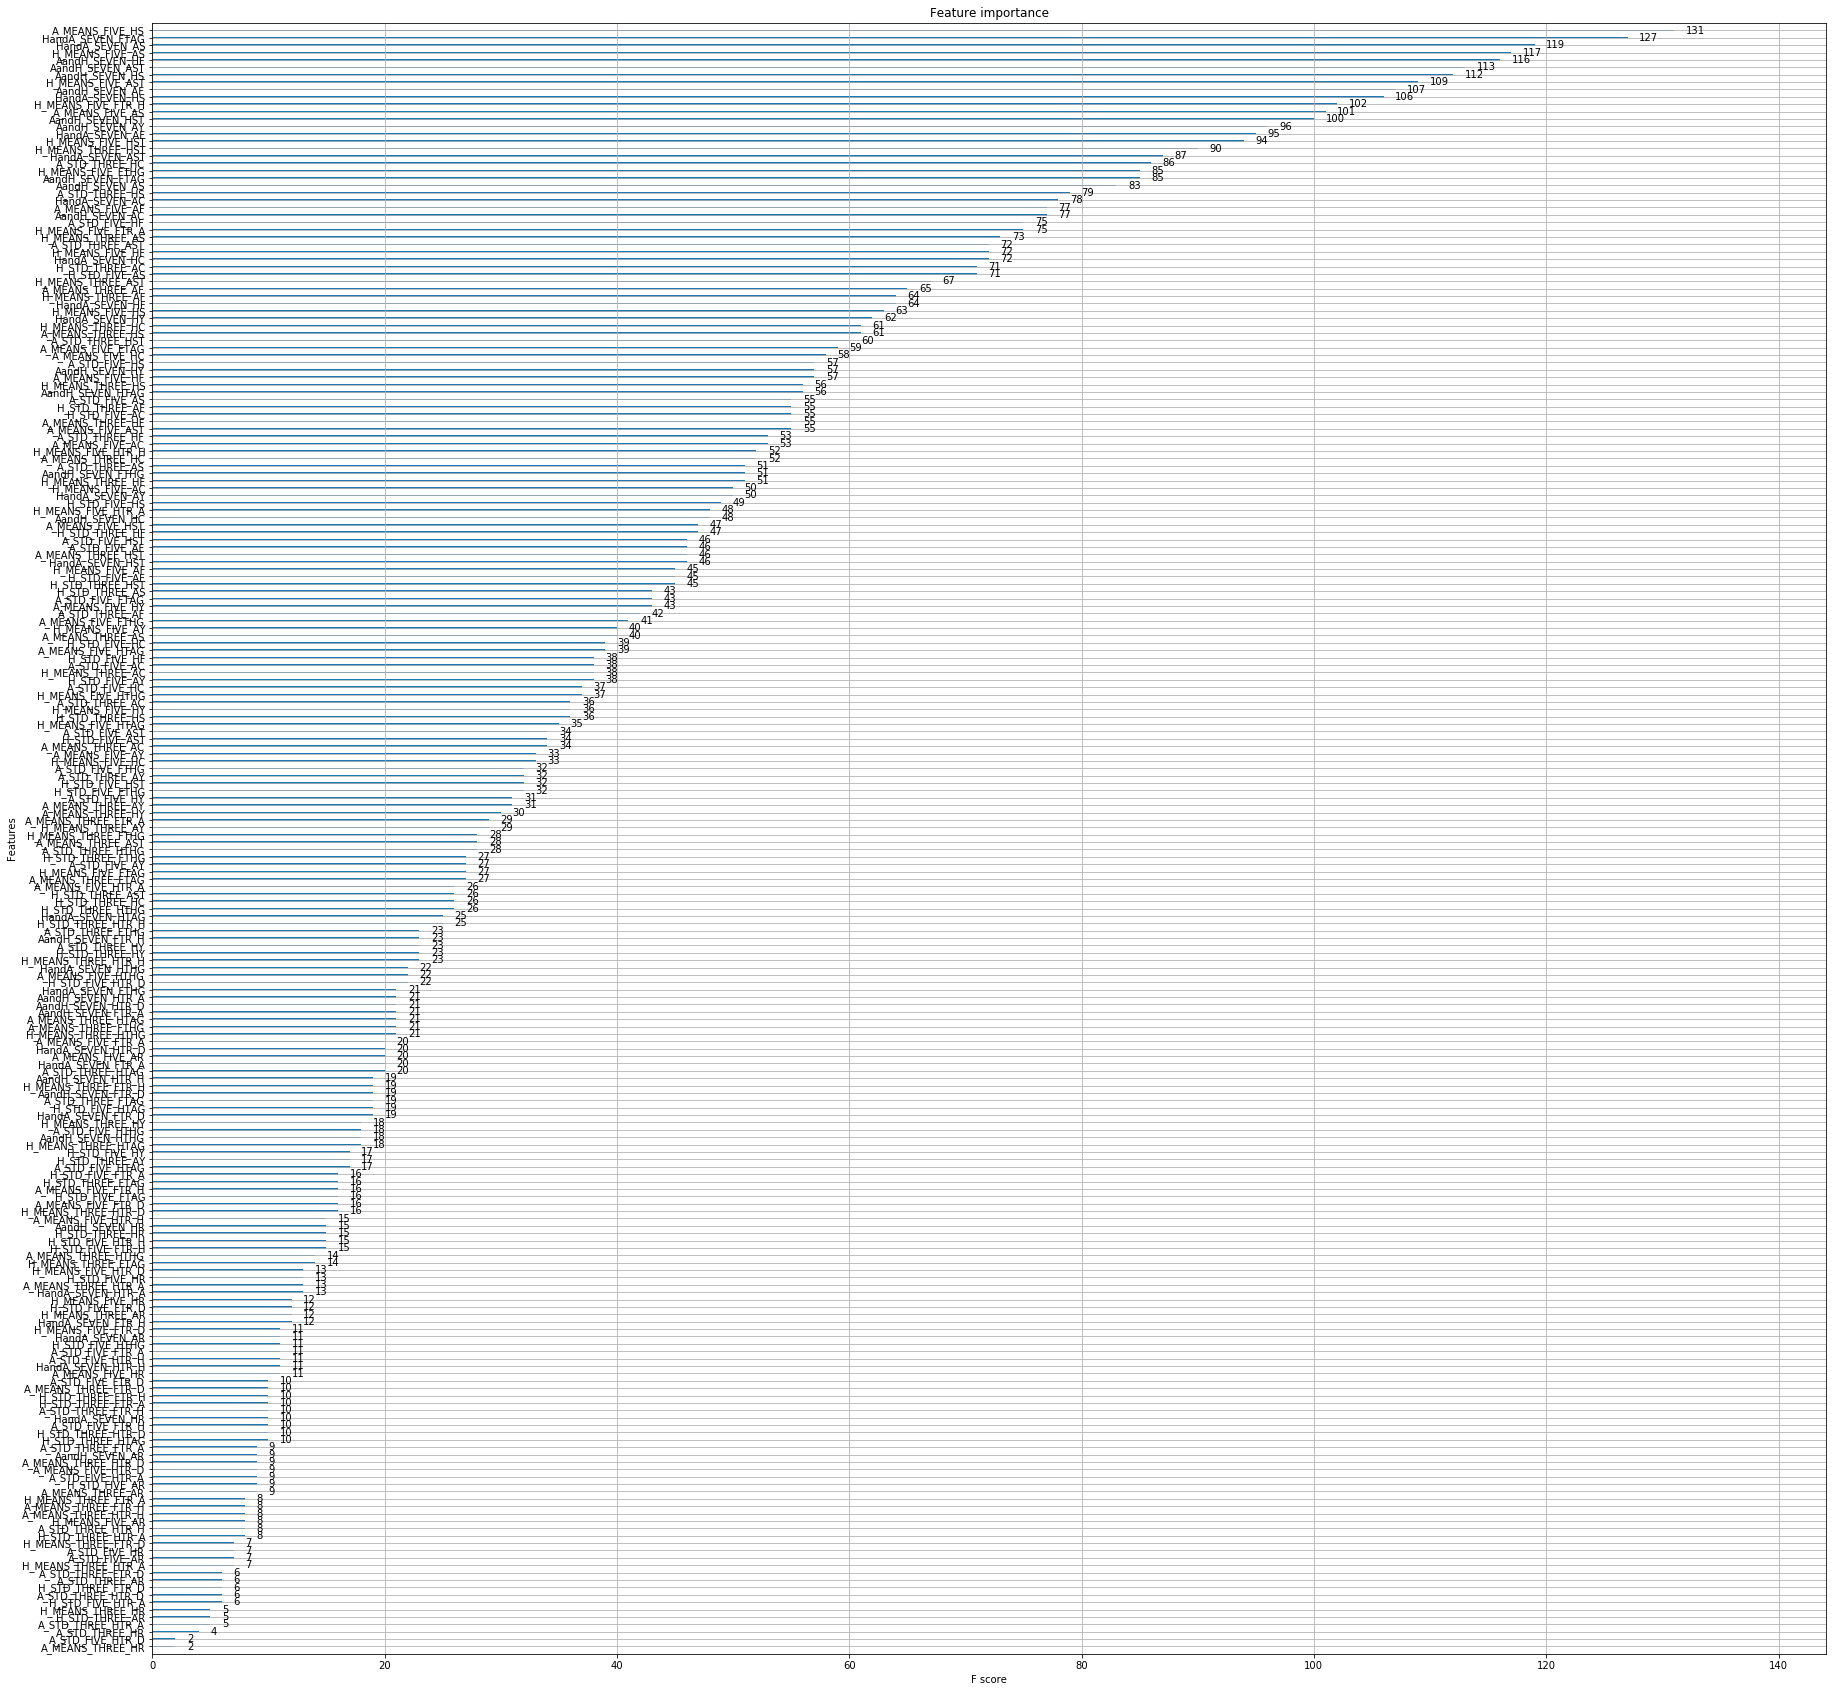

In [12]:
# plot feature importance
import matplotlib.pyplot as plt # plotting library
from xgboost import plot_importance
from matplotlib import pyplot
fig, ax = plt.subplots(figsize=(30,30))
plot_importance(model, ax=ax)
pyplot.show()